In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os

# path = '/content/drive/MyDrive/Deep Learning/'
# os.chdir(path)

In [ ]:
# Extract dataset
!unzip Boston_Uber.zip

Archive:  Boston_Uber.zip
   creating: Boston_Uber/
  inflating: Boston_Uber/Boston _Uber_Data.ipynb  
 extracting: Boston_Uber/rideshare_kaggle.csv.zip  


In [2]:
import os
os.chdir('/content/drive/MyDrive/Deep Learning/Boston_Uber/')

In [ ]:
!unzip rideshare_kaggle.csv.zip

Archive:  rideshare_kaggle.csv.zip
  inflating: rideshare_kaggle.csv    


In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [4]:
data = pd.read_csv('rideshare_kaggle.csv')

In [5]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
copy = data.copy()

In [7]:
# Handle unwanted data:
print(data.isnull().sum())
data = data.dropna()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [8]:
ex_cols = ['apparentTemperature','apparentTemperatureMaxTime','apparentTemperatureMax','apparentTemperatureMinTime',
           'apparentTemperatureMin','temperatureMaxTime','temperatureMinTime','apparentTemperatureHigh',
           'apparentTemperatureLowTime','apparentTemperatureHighTime','apparentTemperatureHigh','temperatureLowTime',
           'temperatureHighTime','precipIntensity','humidity','windGust','windSpeed','dewPoint','precipIntensityMax','cloudCover',
           'moonPhase','windGustTime','visibility','uvIndex','windBearing','visibility.1','ozone','sunriseTime',
           'sunsetTime','uvIndexTime']

In [9]:
data=data.drop(ex_cols,axis=1)

In [10]:
data['datetime'] = pd.to_datetime(data['datetime'], format = "%Y/%m/%d %H:%M:%S")

Text(0.5, 1.0, 'Number of trip VS hours')

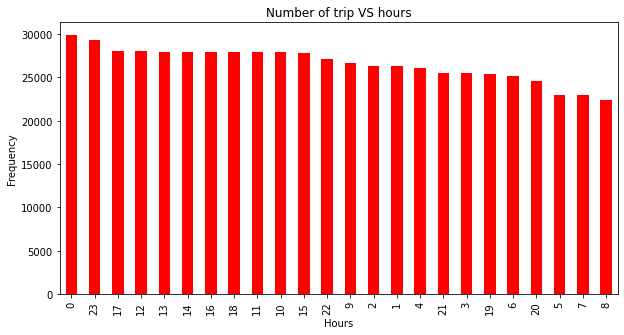

In [11]:
# See at what time of the day the user rides an Uber the most?
hours = data['hour'].value_counts()
hours.plot(kind = 'bar', color = 'red', figsize = (10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trip VS hours')

In [12]:
day_week = [calendar.day_name[x.dayofweek] for x in data['datetime']]
day_week = pd.Series(day_week)

Text(0.5, 1.0, 'Number of trip VS days')

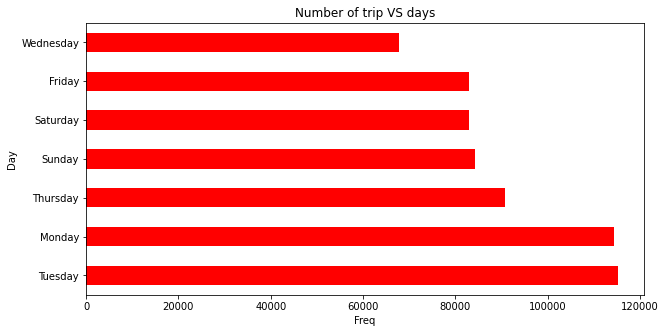

In [13]:
# Look number of trip in days of week
days=day_week.value_counts()
days.plot(kind = 'barh', color = 'red', figsize = (10,5))
plt.xlabel('Freq')
plt.ylabel('Day')
plt.title('Number of trip VS days')

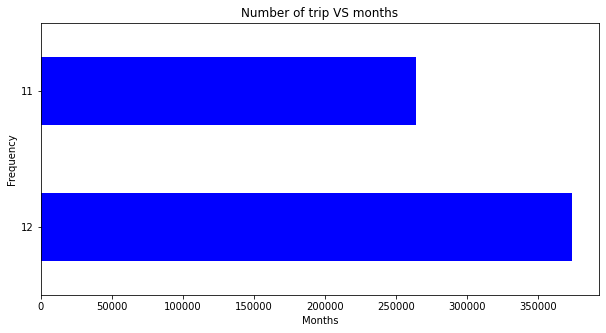

In [14]:
# Look number of trip in month
months = data['month'].value_counts()
months.plot(kind = 'barh', color = 'blue', figsize = (10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Number of trip VS months')
plt.show()

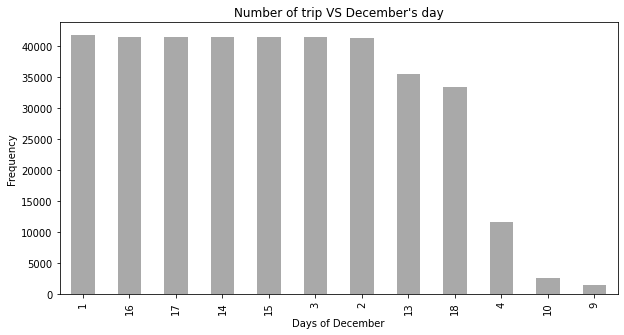

In [15]:
day = data['day'][data['month']==12].value_counts()
day.plot(kind = 'bar', color = 'darkgrey', figsize = (10,5))
plt.xlabel('Days of December')
plt.ylabel('Frequency')
plt.title("Number of trip VS December's day")
plt.show()

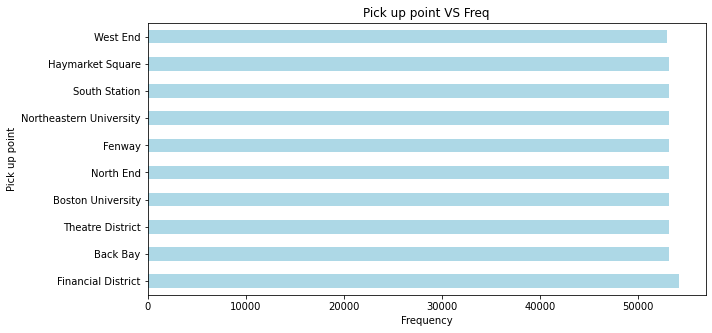

In [16]:
pick_up = data['source'].value_counts().nlargest(10)
pick_up.plot(kind = 'barh', color = 'lightblue', figsize = (10,5))
plt.xlabel('Frequency')
plt.ylabel('Pick up point')
plt.title("Pick up point VS Freq")
plt.show()

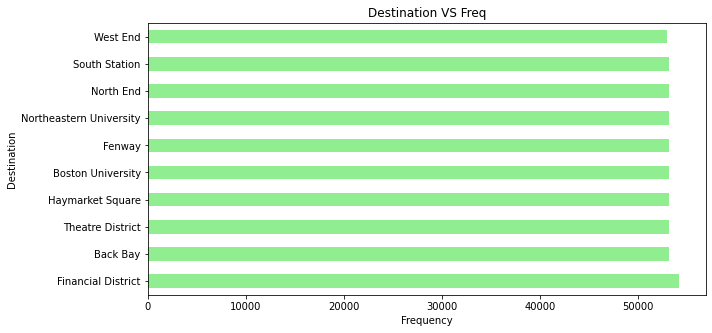

In [17]:
dest = data['destination'].value_counts().nlargest(10)
dest.plot(kind = 'barh', color = 'lightgreen', figsize = (10,5))
plt.xlabel('Frequency')
plt.ylabel('Destination')
plt.title("Destination VS Freq")
plt.show()

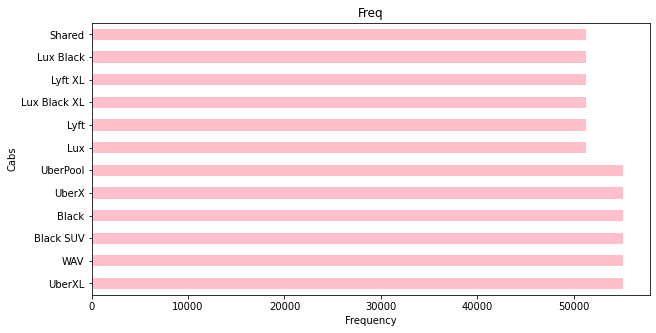

In [18]:
# see which types of Uber cabs do people prefer in Boston
cabs = data['name'].value_counts()
cabs.plot(kind = 'barh', color = 'pink', figsize = (10,5))
plt.xlabel('Frequency')
plt.ylabel('Cabs')
plt.title("Freq")
plt.show()

In [ ]:
# Predictive Analysis for Uber Price Prediction using ML

In [19]:
# Bring all the categorical data to the numeric format using label encoding:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [20]:
data['id'] = label_encoder.fit_transform(data['id'])
data['datetime'] = label_encoder.fit_transform(data['datetime'])
data['timezone'] = label_encoder.fit_transform(data['timezone'])
data['destination'] = label_encoder.fit_transform(data['destination'])
data['product_id'] = label_encoder.fit_transform(data['product_id'])
data['short_summary'] = label_encoder.fit_transform(data['short_summary'])
data['long_summary'] = label_encoder.fit_transform(data['long_summary'])
data['name'] = label_encoder.fit_transform(data['name'])

In [21]:
print("Class mapping of Name: \n")
for i,item in enumerate(label_encoder.classes_):
    print(item,"==>",i)

Class mapping of Name: 

Black ==> 0
Black SUV ==> 1
Lux ==> 2
Lux Black ==> 3
Lux Black XL ==> 4
Lyft ==> 5
Lyft XL ==> 6
Shared ==> 7
UberPool ==> 8
UberX ==> 9
UberXL ==> 10
WAV ==> 11


In [22]:
# Label for pick up point:
data['source'] = label_encoder.fit_transform(data['source'])
print("Class mapping of Source: \n")
for i,item in enumerate(label_encoder.classes_):
    print(item,"==>",i)

Class mapping of Source: 

Back Bay ==> 0
Beacon Hill ==> 1
Boston University ==> 2
Fenway ==> 3
Financial District ==> 4
Haymarket Square ==> 5
North End ==> 6
North Station ==> 7
Northeastern University ==> 8
South Station ==> 9
Theatre District ==> 10
West End ==> 11


In [23]:
# Label for current weather:
data['icon'] = label_encoder.fit_transform(data['icon'])
print("Class mapping of Weather: \n")
for i,item in enumerate(label_encoder.classes_):
    print(item,"==>",i)

Class mapping of Weather: 

 clear-day  ==> 0
 clear-night  ==> 1
 cloudy  ==> 2
 fog  ==> 3
 partly-cloudy-day  ==> 4
 partly-cloudy-night  ==> 5
 rain  ==> 6


In [24]:
# Label for cab type:
data['cab_type'] = label_encoder.fit_transform(data['cab_type'])
print("Class mapping of Cab type: \n")
for i,item in enumerate(label_encoder.classes_):
    print(item,"==>",i)

Class mapping of Cab type: 

Lyft ==> 0
Uber ==> 1


In [25]:
# Since we are only predicting the prices for Uber, our dataset will contain ~ 400000 records
len(data[data['cab_type']==1])

330568

In [26]:
# Train-test split with the price col as target:
X = data[data['cab_type']==1].drop(['price','cab_type'], axis=1)
y = data[data['cab_type']==1]['price']

In [ ]:
X.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,...,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,apparentTemperatureLow,icon,pressure,temperatureMin,temperatureMax
12,1587,1.543616e+09,22,30,11,8838,0,6,11,3,...,5,4,0.00,42.52,31.71,28.06,2,1017.16,28.79,42.52
13,89488,1.544698e+09,10,13,12,17861,0,6,11,1,...,0,6,0.00,33.83,27.27,24.61,1,1031.51,18.29,33.83
14,133066,1.544729e+09,19,13,12,18749,0,6,11,0,...,4,6,0.00,33.83,27.27,24.61,4,1033.65,18.29,33.83
15,201507,1.545005e+09,23,16,12,26864,0,6,11,5,...,3,9,0.94,43.83,34.25,28.30,6,1012.72,39.22,43.83
16,362784,1.544748e+09,0,14,12,19333,0,6,11,2,...,5,6,0.00,33.83,27.27,24.61,2,1035.06,18.29,33.83


In [ ]:
y.head()

12    12.0
13    16.0
14     7.5
15     7.5
16    26.0
Name: price, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

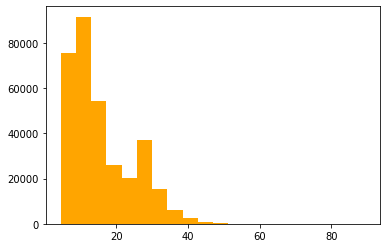

In [28]:
# look at what the typical prices are for the rides
plt.hist(y,bins=20,color='orange')
plt.show()

In [ ]:
# Train and compare the performance of four ML models: linear regression, decision tree, random forest, and gradient boosting.
# Feature selection technique like RFE would be helpful for optimal analysis

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble

In [30]:
# Define function to train and test all 4 models:
def train_test_models(X_train, y_train, X_test, y_test):
    print("Linear Regression:")
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    print(lr.score(X_test, y_test))
    
    print("Decision Tree:")
    dt=DecisionTreeRegressor(random_state=0, max_depth=10)
    dt.fit(X_train,y_train)
    print(dt.score(X_test, y_test))
    
    print("RandomForestRegressor:")
    rf=RandomForestRegressor(n_estimators=20,random_state=0)
    rf.fit(X_train,y_train)
    print(rf.score(X_test, y_test))
    
    print("Gradient Boosting:")
    gb=ensemble.GradientBoostingRegressor(n_estimators=200,max_depth=5)
    gb.fit(X_train,y_train)
    print(gb.score(X_test, y_test))
    
    return [lr,dt,rf,gb]

In [31]:
# Define a function that runs RFE and extracts the most important features for each type of model trained:
def features_eliminate(trained_model, X, y, n_features=40):
    rfe=RFE(trained_model, n_features_to_select = n_features)
    rfe.fit(X,y)
    X_new=X[X.columns[rfe.support_]]
    X_train, X_test, y_train, y_test = train_test_split(X_new,y,
                                                        test_size=0.2,
                                                        random_state=0)
    new_fit=trained_model.fit(X_train,y_train)
    print(new_fit.score(X_test,y_test))

In [32]:
model_list = train_test_models(X_train, y_train, X_test, y_test)

Linear Regression:
0.6524660741268231
Decision Tree:
0.9483347334911975
RandomForestRegressor:
0.9418242663576032
Gradient Boosting:
0.9519291443701361


In [ ]:
# find the models perform marginally better with fewer features
n_features = [5,10,15,20]

for model in model_list:
  for nf in n_features:
    print(f"{model}-->{nf} features")
    features_eliminate(model, X, y, nf)

LinearRegression()-->5 features
0.6564219657294842
LinearRegression()-->10 features
0.656474955633241
LinearRegression()-->15 features
0.6564647493601425
LinearRegression()-->20 features
0.6564276905363713
DecisionTreeRegressor(max_depth=10, random_state=0)-->5 features
0.9519683669372733
DecisionTreeRegressor(max_depth=10, random_state=0)-->10 features
0.9503130650541497
DecisionTreeRegressor(max_depth=10, random_state=0)-->15 features
0.9502081869652445
DecisionTreeRegressor(max_depth=10, random_state=0)-->20 features
0.949850281068529
RandomForestRegressor(n_estimators=20, random_state=0)-->5 features
0.9412401763032776
RandomForestRegressor(n_estimators=20, random_state=0)-->10 features
0.9435149060049464
RandomForestRegressor(n_estimators=20, random_state=0)-->15 features
0.9436601693023255
RandomForestRegressor(n_estimators=20, random_state=0)-->20 features
0.943398867338337
GradientBoostingRegressor(max_depth=5, n_estimators=200)-->5 features
0.9537291538850018
GradientBoostingR